In [1]:
import os
import csv
import pylab as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline


with open('combined.csv', 'w',encoding='utf-8') as csvout:
    writer = csv.writer(csvout)
    for i in os.listdir():
        skip=10
        if '.csv' in i and 'combined' not in i:
            print(i)
            with open(i, encoding='utf-8') as csvfile:
                csvreader = csv.reader(csvfile, delimiter=',')
                while skip > 0:
                    next(csvreader)
                    skip+= -1
                writer.writerows(csvreader)

12014-62014.csv
12015-62015.csv
12016-62016.csv
12017-62017.csv
12018-52018.csv
62018-122018.csv
72014-122014.csv
72015-122015.csv
72016-122016.csv
72017-122017.csv


In [2]:
import os
import csv
class accident:
        def __init__(self,crashid,atintersection,crashtime,crashyear,dayofweek,intersectionstreetname,\
                     latitude,longitude,charge,citation,personalcoholresult,alcoholspecimentype,bac,\
                     deathcount,drugtestresult,ethnicity,gender):
            self.day = dayofweek
            self.yr = crashyear
            self.st = intersectionstreetname
            self.gen = gender
            self.eth = ethnicity
            self.bac = bac
            self.rip = deathcount
            self.t = crashtime

In [3]:
#accidents caused by drunk driving by day of week over ethinicity
ethnicity = []
time = []
timed = []
bac = []
gender =[]
empty = ''
day = {'M':0,'Tu':0,'W':0,'Th':0,'F':0,'Sa':0,'Su':0}

with open('combined.csv',encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        if len(row) > 0:
            temp = accident(*row)
            if temp.bac != empty and temp.bac !='No Data' and temp.bac !='0':
                ethnicity.append(temp.eth)
                time.append(temp.t)
                bac.append(temp.bac)
                gender.append(temp.gen)
                if temp.day == 'MONDAY':
                    timed.append(temp.t)
                    day['M'] += 1
                elif temp.day == 'TUESDAY':
                    timed.append(int(temp.t)+2400)
                    day['Tu'] += 1
                elif temp.day == 'WEDNESDAY':
                    timed.append(int(temp.t)+4800)
                    day['W'] += 1
                elif temp.day == 'THURSDAY':
                    timed.append(int(temp.t)+7200)
                    day['Th'] += 1
                elif temp.day == 'FRIDAY':
                    timed.append(int(temp.t)+9600)
                    day['F'] += 1
                elif temp.day == 'SATURDAY':
                    timed.append(int(temp.t)+12000)
                    day['Sa'] += 1
                elif temp.day == 'SUNDAY':
                    timed.append(int(temp.t)+14400)
                    day['Su'] += 1
                else:
                    print(temp.day)

In [27]:
Bx = [int(x) for x,y,z in zip(time,ethnicity,bac) if y[0]=='B'and float(z)>0.15 and float(z)<0.40]
By = [float(x) for x,y in zip(bac,ethnicity) if y[0] =='B' and float(x)>0.15 and float(x)<0.40]
Wx = [int(x) for x,y,z in zip(time,ethnicity,bac) if y[0]=='W'and float(z)>0.15 and float(z)<0.40]
Wy = [float(x) for x,y in zip(bac,ethnicity) if y[0] =='W'and float(x)>0.15 and float(x)<0.40]
Ax = [int(x) for x,y,z in zip(time,ethnicity,bac) if y[0]=='A'and float(z)>0.15 and float(z)<0.40]
Ay = [float(x) for x,y in zip(bac,ethnicity) if y[0] =='A'and float(x)>0.15 and float(x)<0.40]
Hx = [int(x) for x,y,z in zip(time,ethnicity,bac) if y[0]=='H'and float(z)>0.15 and float(z)<0.40]
Hy = [float(x) for x,y in zip(bac,ethnicity) if y[0] =='H'and float(x)>0.15 and float(x)<0.40]
Tx = [int(x) for x,y,z in zip(time,ethnicity,bac) if float(z)>0.15 and float(z)<0.40]
Ty = [float(x) for x,y in zip(bac,ethnicity) if float(x)>0.15 and float(x)<0.40]

Mx = [int(x) for x,y,z in zip(time,gender,bac) if 'FEMALE' not in y and 'MALE' in y and float(z)>0.15 and float(z)<0.40]
My = [float(x) for x,y in zip(bac,gender) if 'FEMALE' not in y and 'MALE' in y and float(x)>0.15 and float(x)<0.40]
Fx = [int(x) for x,y,z in zip(time,gender,bac) if 'FEMALE' in y and float(z)>0.15 and float(z)<0.40]
Fy = [float(x) for x,y in zip(bac,gender) if 'FEMALE' in y and float(x)>0.15 and float(x)<0.40]

In [28]:
days = day.items()
x,y = zip(*days)
sumy = np.sum(y)
y = [i/sumy for i in y ]

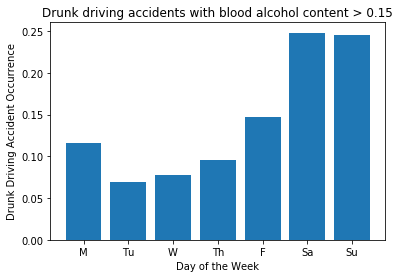

In [184]:
plt.bar(x,y)
plt.xlabel('Day of the Week')
plt.ylabel('Drunk Driving Accident Occurrence')
plt.title('Drunk driving accidents with blood alcohol content > 0.15')
plt.savefig('DrunkDriving.png')

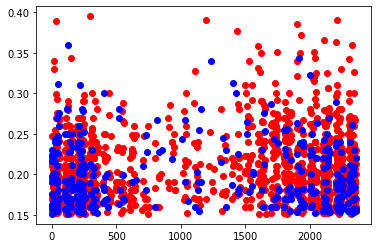

In [15]:
plt.plot(Mx,My, 'ro')
plt.plot(Fx,Fy, 'bo')
plt.show()

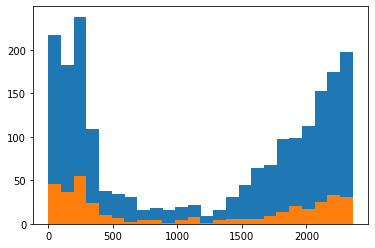

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rectangles = ax.hist(Tx, 24)#, density=True)
n,bins,rectangles = ax.hist(Fx,24)#,density=True)
plt.show()

In [100]:
len(Fx)

374

In [103]:
len(Mx)

1518

In [119]:
#accidents by ethinicity
ethnicity = []
time = []
timed = []
gender =[]
empty = ''
day = {'M':0,'Tu':0,'W':0,'Th':0,'F':0,'Sa':0,'Su':0}
year = {2014:0,2015:0,2016:0,2017:0,2018:0}

with open('combined.csv',encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        if len(row) > 0:
            temp = accident(*row)
            ethnicity.append(temp.eth)
            time.append(temp.t)
            gender.append(temp.gen)
            if temp.bac != empty and temp.bac !='No Data' and temp.bac !='0':
                year[int(temp.yr)] += 1
            if temp.day == 'MONDAY':
                timed.append(temp.t)
                day['M'] += 1
            elif temp.day == 'TUESDAY':
                timed.append(int(temp.t)+2400)
                day['Tu'] += 1
            elif temp.day == 'WEDNESDAY':
                timed.append(int(temp.t)+4800)
                day['W'] += 1
            elif temp.day == 'THURSDAY':
                timed.append(int(temp.t)+7200)
                day['Th'] += 1
            elif temp.day == 'FRIDAY':
                timed.append(int(temp.t)+9600)
                day['F'] += 1
            elif temp.day == 'SATURDAY':
                timed.append(int(temp.t)+12000)
                day['Sa'] += 1
            elif temp.day == 'SUNDAY':
                timed.append(int(temp.t)+14400)
                day['Su'] += 1
            else:
                print(temp.day)

In [120]:
years = 5
Bx = [int(x) for x,y in zip(time,ethnicity) if y[0]=='B']
By = [float(x) for x,y in zip(bac,ethnicity) if y[0] =='B']
Wx = [int(x) for x,y in zip(time,ethnicity) if y[0]=='W']
Wy = [float(x) for x,y in zip(bac,ethnicity) if y[0] =='W']
Ax = [int(x) for x,y in zip(time,ethnicity) if y[0]=='A']
Ay = [float(x) for x,y in zip(bac,ethnicity) if y[0] =='A']
Hx = [int(x) for x,y in zip(time,ethnicity) if y[0]=='H']
Hy = [float(x) for x,y in zip(bac,ethnicity) if y[0] =='H']
Tx = [int(x) for x,y in zip(time,ethnicity)]
Ty = [float(x) for x,y in zip(bac,ethnicity)]

Mx = [int(x) for x,y,z in zip(time,gender,bac) if 'FEMALE' not in y and 'MALE' in y]
My = [float(x) for x,y in zip(bac,gender) if 'FEMALE' not in y and 'MALE' in y]
Fx = [int(x) for x,y,z in zip(time,gender,bac) if 'FEMALE' in y]
Fy = [float(x) for x,y in zip(bac,gender) if 'FEMALE' in y]


[ 613.6  458.8  643.4  319.8  212.2  494.  1387.6 2298.4 2488.  2030.
 1927.6 2386.6 2817.  2758.8 2949.4 3461.4 4085.6 3941.6 3280.6 2086.6
 1410.6 1276.2 1127.8  855.6]


J:\Anaconda\lib\site-packages\ipykernel_launcher.py:75: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


<Figure size 432x288 with 0 Axes>

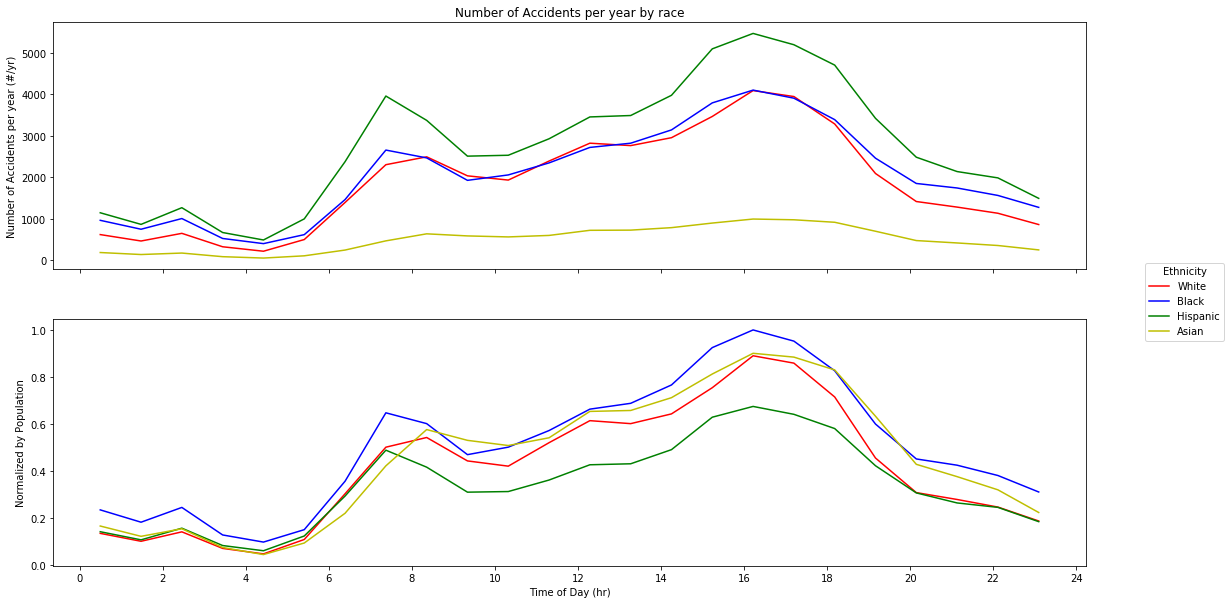

In [183]:
n,bins, rectangles = plt.hist(Wx, 24)#, density=True)
n2,bins2,rectangles = plt.hist(Bx,24)#,density=True)
n3,bins3,rectangles = plt.hist(Hx,24)#,density=True)
n4,bins4,rectangles = plt.hist(Ax,24)#,density=True)

#normalized to census data https://www.houstontx.gov/planning/Demographics/docs_pdfs/2016/2016-demographic.pdf
WP = 0.251
BP = 0.224
HP = 0.443
AP = 0.060
RL = range(len(n))

for i in RL:
    n[i] = n[i]/years
for i in RL:
    n2[i] = n2[i]/years
for i in RL:
    n3[i] = n3[i]/years
for i in RL:
    n4[i] = n4[i]/years

plt.clf()
for i in range(len(bins)-1):
    bins[i] = (bins[i] + bins[i+1])/(2*100)
bins = np.delete(bins,-1)
for i in range(len(bins2)-1):
    bins2[i] = (bins2[i] + bins2[i+1])/(2*100)
bins2 = np.delete(bins2,-1)
for i in range(len(bins3)-1):
    bins3[i] = (bins3[i] + bins3[i+1])/(2*100)
bins3 = np.delete(bins3,-1)
for i in range(len(bins4)-1):
    bins4[i] = (bins4[i] + bins4[i+1])/(2*100)
bins4 = np.delete(bins4,-1)
print(n)
fig, ax = plt.subplots(2,sharex=True)
ax[0].plot(bins,n,'r')
ax[0].plot(bins2,n2,'b')
ax[0].plot(bins3,n3,'g')
ax[0].plot(bins4,n4,'y')
ax[0].set(ylabel='Number of Accidents per year (#/yr)')
ax[0].set(title='Number of Accidents per year by race')
ax[0].set(xticks=(np.arange(0,25,step=2)))
for i in RL:
    n[i] = n[i]/WP
for i in RL:
    n2[i] = n2[i]/BP
for i in RL:
    n3[i] = n3[i]/HP
for i in RL:
    n4[i] = n4[i]/AP

m= max(n)
m2 = max(n2)
m3 = max(n3)
m4 = max(n4)
m = max(m,m2,m3,m4)

for i in RL:
    n[i] = n[i]/m
for i in RL:
    n2[i] = n2[i]/m
for i in RL:
    n3[i] = n3[i]/m
for i in RL:
    n4[i] = n4[i]/m
    
    
l1=ax[1].plot(bins,n,'r')
l2=ax[1].plot(bins2,n2,'b')
l3=ax[1].plot(bins3,n3,'g')
l4=ax[1].plot(bins4,n4,'y')
ax[1].set(xlabel='Time of Day (hr)')
ax[1].set(ylabel='Normalized by Population')
fig.legend([l1,l2,l3,l4],labels=['White','Black','Hispanic','Asian'],loc="right",borderaxespad = 0.1,title='Ethnicity')
fig.set_size_inches(18.5,10)
fig.savefig('AccidentsEthnicity.png')

In [99]:
len(y)

7

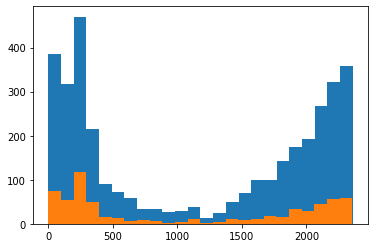

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rectangles = ax.hist(Tx, 24)#, density=True)
n,bins,rectangles = ax.hist(Fx,24)#,density=True)
plt.show()

<BarContainer object of 5 artists>

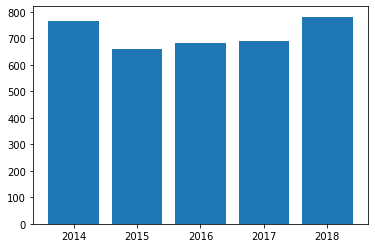

In [132]:
years = year.items()
x,y = zip(*years)
plt.bar(x,y)